# Eigenvalues and Eigenvectors

- Problem 0 familiarizes you with calling functions from other files.
- Problem 1 familiarizes you with the use of a relevant numpy function.
- Problem 2 makes you manipulate and reflect upon a method used to find eigenvalues and eigenvectors.
- Problem 3 asks you to assess the complexity of the QR method. 
- Problem 4 tests how you handle a loosely-defined coding task.


#### Some questions ask you to write text to explain your solutions - do not skip these.

## Problem 0

Goal: Be able to use functions from another file and to call the function correctly using information from its docstring.

Tasks: 

i) Import the function `testcreate1` from the file SEE125_eig_lib.py

ii) Print the function's docstring. Hint: you can use the name of the function followed by `?`.

iii) Call the function to create a 4x4 matrix whose 0-0 element is the square root of 21. Store the result in a matrix named `A`.

For information on docstrings, see https://www.geeksforgeeks.org/python-docstrings/

In [2]:
### YOUR CODE HERE

from SEE125_eig_lib import testcreate

print(testcreate.__doc__)

A = testcreate(4, 21)




 Create a square matrix where 
        each element's value is the square root of the 
        previous elements'value increased by 1. 

        Parameters: 
                n -- the shape of the matrix will be (n,n) (int)
                val2 -- the square root of this number will be the first matrix 
                        element at row 0, column 0 (float, positive or zero)
        Returns: 
                numpy array of size (n,n)

    


## Problem 1

Goal: Correct usage of `numpy.linalg.eig` and demonstration of understanding of the result.

Background: 
The normalized direct power method is an iterative method that allows to find the _largest_ eigenvalue of a matrix, and its corresponding eigenvector. We described it during the lecture and implemented it using the following algorithm:

$$
\pmb{z}^{(k)} = \pmb{Aq}^{(k-1)} \\
\pmb{q}^{(k)} = \frac{\pmb{z}^{(k)}}{\|\pmb{z}^{(k)}\|} \\
\mu(\pmb{q}^{(k)}) = [\pmb{q}^{(k)}]^T\pmb{Aq}^{(k)}
$$

Note: Remember that $^{(k)}$ means the $k^{th}$ iteration. The value $\mu(\pmb{q}^{(k)})$ tends toward the largest eigenvalue as $k$ increases.

We have implemented this method in the function `power` in the SEE125_eig_lib.py library (code based on page 180).

Tasks:

i) Import the function `power` from the SEE125_eig_lib.py file.

ii) Run it on the matrix `B = np.array([[3,2],[0,1]])`.

iii) Compare the resulting eigenvalue and eigenvector with the output from `numpy.linalg.eig`.

Hint: The numpy function returns all eigenvalues and eigenvectors but you only need the largest eigenvalue and its eigenvector. 

In [3]:
### BEGIN SOLUTION #####
import numpy as np

from SEE125_eig_lib import power

B = np.array([[3, 2], [0, 1]])
print(B)

eig_power, vector_power = power(B)

def largest_eig(B):
    eig_linalg = np.linalg.eig(B)
    eig_values = eig_linalg[0]
    eig_largest, index = np.max(eig_values), np.argmax(eig_values)
    eig_vec_largest = eig_linalg[1][:, index]
    return eig_largest, eig_vec_largest

eig, vec = largest_eig(B)


print("Largets eigenvalue from power {}, eigenvector from power{}, largest eigenvalue from linalg {}, eigenvector from linalg {}".format(eig_power, vector_power, eig, vec))
 
### END SOLUTION ####

[[3 2]
 [0 1]]
1 [0.98058068 0.19611614]
2 [0.99827437 0.05872202]
3 [0.99982205 0.01886457]
4 [0.99998071 0.00621106]
5 [0.99999787 0.00206185]
Largets eigenvalue from power 3.004115191347896, eigenvector from power[0.99999787 0.00206185], largest eigenvalue from linalg 3.0, eigenvector from linalg [1. 0.]


## Problem 2

Goal: Identify a problem in the implementation of an algorithm and correct it. 

Background: 

Here we have implemented the power method but, instead on iterating $k$ until reaching some preset maximum number of iterations, the iterative process stops automatically when a convergence criterion is reached. This criterion is:

$$
\sum_{j=0}^{n-1} \Bigg| \frac{q_j^{(k)} - q_j^{(k-1)}}{q_j^{(k)}} \Bigg| \leq \epsilon 
$$

It means that the iteration should stop once the relative difference between $\pmb{q}$ at two successive iterations is negligible ($\epsilon$ conventionally refers to a value close to $0$).

- The function prints the total number of iterations needed to reach the criterion and return the eigenvalue and its corresponding eigenvector.
- If the solution fails to converge, the function prints that the convergence failed and returns `None` as eigenvalue and eigenvector.  

### 1.1

Write a docstring for the function explaining the function inputs and outputs so that future users would better understand its usage.  For examples of how to write docstrings you can check out this link: https://www.geeksforgeeks.org/python-docstrings/

In [4]:
def powercrit(A, ceps=1e-8, kmax=50): 
    ### BEGIN SOLUTION ###
    ### END SOLUTION ###
    
    zs = np.ones(A.shape[0])#the initial guess
    
    qs = zs/np.linalg.norm(zs)
    # This is the power method with the new convergence criterion    
    for k in range(kmax): # also keep a max of iteration
        zs = A@qs
        qskm1 = qs
        qs = zs/np.linalg.norm(zs)     
        crit = np.sum(np.linalg.norm(qs-qskm1)/np.linalg.norm(qs))
        crit_1 = np.sum(np.linalg.norm(qs+qskm1)/np.linalg.norm(qs))
        print(crit, qs)
        if crit<ceps or crit_1<ceps:
            lam = qs.T@A@qs # same as qs@A@qs, Python will transpose
            print('Convergence reached after {:d} iterations'.format(k+1))
            break
    else:     
        lam = qs = None
        print('Convergence failed')
    
    return lam, qs


## 1.2

Compare the results of `powercrit(A)`, where `A` is the matrix from Problem 0, to the results from `numpy.linalg.eig(A)`. Write a comment on how you find the comparison.

In [5]:
# The matrix to work on, please keep these parameters
# A = testcreate(4, 21)
# With $\epsilon = 10^{-8}$ and the matrix `A = testcreate(4, 21)`, 
# the solution should be found in $4$ iterations.


### BEGIN SOLUTION ###
eig_val_1_power, eig_vec_1_power = powercrit(A)

eig_1, vec_1 = largest_eig(A)

print("Largets eigenvalue from power {}, eigenvector from power{}, largest eigenvalue from linalg {}, eigenvector from linalg {}".format(eig_val_1_power, eig_vec_1_power, eig_1, vec_1))

#The comparison is very similiar.
### END SOLUTION ###

0.0790278300700733 [0.44421209 0.48212489 0.51726163 0.55015599]
0.0002489301676206495 [0.4443962  0.4821814  0.5172089  0.55000734]
7.851497309943422e-07 [0.44439562 0.48218122 0.51720907 0.55000781]
2.4763975497241033e-09 [0.44439562 0.48218122 0.51720906 0.55000781]
Convergence reached after 4 iterations
Largets eigenvalue from power 21.316662663461866, eigenvector from power[0.44439562 0.48218122 0.51720906 0.55000781], largest eigenvalue from linalg 21.316662663452043, eigenvector from linalg [0.44439562 0.48218122 0.51720906 0.55000781]


### 1.2

The implementation above is problematic. Running `powercrit(-A)` where A is the matrix you created in Problem 0 should give a result that converges after 4 iterations. Instead the code does not converge. 

i) Find the problem and explain in a few sentences what it is.

ii) Edit the function so that the solution converges. Explain in a sentence or two the logic behind the solution.

iii) Show that the eigenvalue and eigenvector of your corrected function is consistent with the result from `numpy.linalg.eig`.  

Hint: Update your function to print $\pmb{q}^{(k-1)}$, $\pmb{q}^{(k)}$ and $\mu(\pmb{q}^{(k)})$ at each iteration (and any other parameter that you think could help).



In [6]:
print('powercrit -A')
eigenval, eigenvec = powercrit(-A)

### BEGIN SOLUTION ###
#If the eigenvector changes sign then the differance becomes very big, when it should be smal if the sign is kept
### END SOLUTION ###

powercrit -A
1.9984380405893039 [-0.44421209 -0.48212489 -0.51726163 -0.55015599]
1.999999984508443 [0.4443962  0.4821814  0.5172089  0.55000734]
1.9999999999998461 [-0.44439562 -0.48218122 -0.51720907 -0.55000781]
1.9999999999999998 [0.44439562 0.48218122 0.51720906 0.55000781]
Convergence reached after 4 iterations


### 1.3

Add your final version of the function powercrit to the SEE125_eig_lib.py and test that it imports correctly here. You may need to restart the notebook kernel after you update that file.

In [7]:
### YOUR CODE HERE


# Problem 4

Goal: Evaluate the complexity of an algorithm.

The QR method is an iterative method that allows you to find all eigenvalues and eigenvectors of a matrix. The implementation we discussed in class (and which is in the book in section 4.4.3) is a simple one, and not very efficient. 

Follow the steps below to get a rough estimate of how the runtime scales with size of the input matrix. 

## 4.1

Create diagonal square matrices of different sizes (example starting code below).

[[2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]


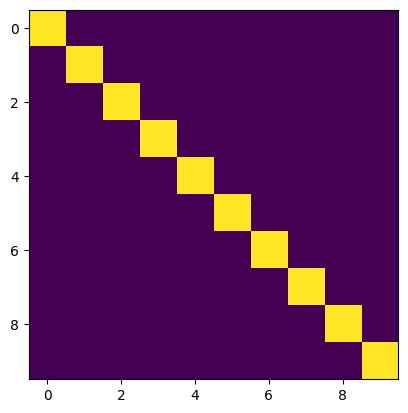

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Use this simple matrix, which you can scale up for the test
A = np.zeros((10,10))
# fill the diagonal of the matrix with the value 2
np.fill_diagonal(A,2)

print(A)

plt.imshow(A)
plt.show()

### 4.2

Run the `qrmet` function from the SEE125_eig_lib.py file on each of the matrices and time it. 

In [9]:
import time 

### BEGIN SOLUTION
from SEE125_eig_lib import qrmet

def matris(n, number):
    """Function that makes a diagonal matrix with n rows and colums, and with the number across the diagonal"""
    A = np.zeros((n,n))
    np.fill_diagonal(A, number)
    return A

start_value = 10
iterations = 60
interval = 5
times = {}
for i in range(start_value, iterations+1, interval):
    start = time.time()
    qrmet(matris(i, 2))
    end = time.time()
    times[i] = end-start

print(times)


### END SOLUTION ###

{10: 0.037480831146240234, 15: 0.05706191062927246, 20: 0.0920264720916748, 25: 0.1365983486175537, 30: 0.1971142292022705, 35: 0.2610328197479248, 40: 0.3658308982849121, 45: 0.44550085067749023, 50: 0.5510444641113281, 55: 0.682732105255127, 60: 0.7943644523620605}


### 4.3

i) Produce a plot comparing the runtimes as a function of input matrix size and comment on what the scaling behavior is. Use a log axis for the runtimes so that one can see the points clearly.

ii) Overplot a line corresponding to your best-guess scaling to show the match with the points.

iii) Compare the runtimes with those of the numpy function `numpy.linalg.eig` applied on the same matrices.  

iv) How does your answer compare to what is found in the operation count section in page 203 of the textbook? 

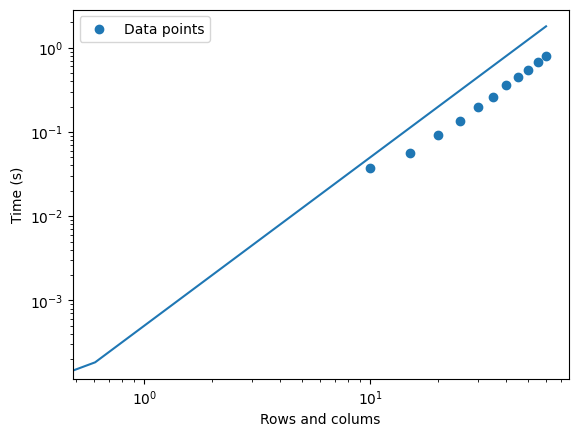

In [10]:
### BEGIN SOLUTION ###
plt.yscale("log")
plt.xscale("log")

plt.xlabel("Rows and colums")
plt.ylabel("Time (s)")

plt.scatter(times.keys(), times.values(), label = "Data points")


x = np.linspace(0, max(times.keys()), 100)
y = np.power(x, 2) / 2000

plt.plot(x, y)

plt.plot
plt.legend()
plt.show()

times_linalg = {}
for k in range(start_value, iterations+1, interval):
    start = time.time()
    np.linalg.eig(matris(k, 2))
    end = time.time()
    times_linalg[k] = end-start




### END SOLUTION ###

# Problem 5

Goal: Get creative! Show us you are able to choose how to design and code a solution to a loosely-defined task. 


### 5.1

Come up with a way to visualize the QR method in Python and explain it so that your fellow students will understand.

### 5.2 

Write comments in your code so that another student can understand what your vizualization does. If you make plots add labels and titles that explain what is shown.

You can choose to focus on any aspect of the algorithm (be it one of the matrices in the iteration, the eigenvalues etc). You can use the `qrmet` function provided in the SEE125_eig_lib.py file as a starting point.

[array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]), array([2., 2., 2., 2.]),

IndexError: index 4 is out of bounds for axis 1 with size 4

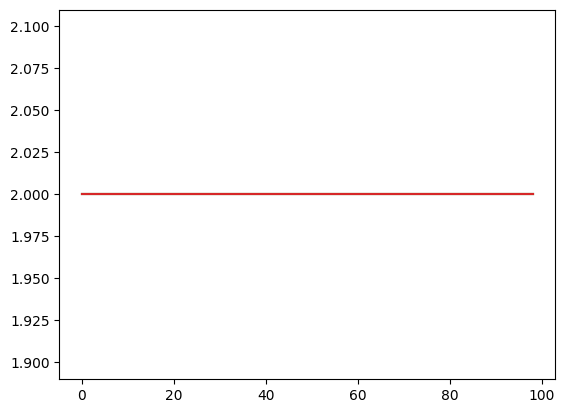

In [14]:
### BEGIN SOLUTION ####
from SEE125_eig_lib import qrdec
A = matris(4, 2)
kmax = 100
def qrmet_new(inA,kmax=100):
    '''
    QR method (page 202)
    '''
    eigvals = []
    A = np.copy(inA)
    for k in range(1,kmax):
        Q, R = qrdec(A)
        A = R@Q
        eigvals.append(np.diag(A))
        #print(k, np.diag(A))
    return eigvals
### END SOLUTION ###

b = qrmet_new(A)
print(b)

eigenvalues_history = np.array(b)
for i in range(kmax):
    plt.plot(eigenvalues_history[:, i], label=f'Eigenvalue {i+1}')


In [ ]:
e1 = []
e2 = []
egen = [e1, e1]
for i in egen

[1 1]
